<a href="https://colab.research.google.com/github/triptig392/SPAM_NOT_SPAM_DETECTOR/blob/main/SPAM_NOT_SPAM_TRIPTI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd #used for data analysis and manipulation
import numpy as np #array and calculations
import matplotlib.pyplot as plt #graph bante
import seaborn as sns  # for preprocessing, model building, and evaluation

# Use the direct download link for the CSV file from Google Drive
# Replace the original URL with the direct download link obtained from Google Drive
# Example format for direct download link: https://drive.google.com/uc?export=download&id=YOUR_FILE_ID
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1n3AYiYOY4G5nhWzV6856pUfRU1khxjA9', encoding='unicode_escape')

In [6]:
from sklearn.preprocessing import LabelEncoder
# this will fit data in df and will give output as number
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])  # Spam = 1, Not Spam = 0

In [7]:
# Step 3: Text Preprocessing (e.g., tokenization and removing stop words)
from sklearn.feature_extraction.text import TfidfVectorizer
# Convert text to numeric using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['email']).toarray()  # Transform email column into TF-IDF vectors

In [8]:
# Step 4: Split Data into Training and Testing Sets
from sklearn.model_selection import train_test_split
y = df['label']  # Target: spam or not spam (1 or 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Step 5: Build the Logistic Regression Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [10]:
# Step 6: Predicting and Evaluating the Model
y_pred = model.predict(X_test)

In [11]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


In [12]:
# Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

#                Predicted
#                0     1
# Actual  0     TN    FP
#         1     FN    TP



Confusion Matrix:
[[104   0]
 [  0  96]]


In [13]:
from sklearn.metrics import  classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


# Accuracy: Overall, how many predictions were correct.
# Macro avg: Average of precision, recall, F1 for both classes, treating all classes equally.
# Weighted avg: Same as macro, but gives more weight to classes with more samples (like if one class dominates).


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00        96

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



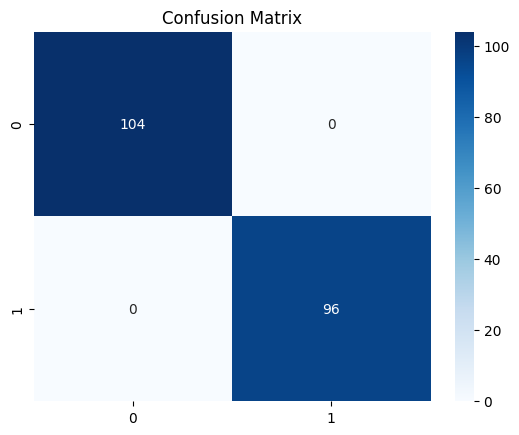

In [14]:
# Optional: Visualizing Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.show()